In [199]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [200]:
data = pd.read_csv('project2.data')

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [202]:
# removing duplicated
print(data.duplicated().sum())
data = data.drop_duplicates()


14


In [203]:
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [204]:
data.shape

(272, 10)

In [205]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [206]:
print("Unique Values:")
for key in data.keys():
    print(f"  {key}:\t\t{len(data[key].unique())}, {data[key].unique()}")


Unique Values:
  class:		2, ['no-recurrence-events' 'recurrence-events']
  age:		6, ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
  menopause:		3, ['premeno' 'ge40' 'lt40']
  tumor-size:		11, ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
  inv-nodes:		7, ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
  node-caps:		3, ['no' 'yes' '?']
  deg-malig:		3, [3 2 1]
  breast:		2, ['left' 'right']
  breast-quad:		6, ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
  irradiat:		2, ['no' 'yes']


In [207]:
# dealing with '?' in the data
nodecap_yes = data['node-caps'] == 'yes'
data['node-caps'] = nodecap_yes

irradiat_bool = data['irradiat'] == 'yes'
data['irradiat'] = irradiat_bool

data.loc[data['breast-quad'] == '?',['breast-quad']] = data['breast-quad'].unique()[0]

In [208]:
# dealing with categorical data (one-hot encoding)
category_keys = ['class', 'menopause', 'breast', 'breast-quad']
for key in category_keys:
    data[key] = data[key].astype("category")
    data = pd.get_dummies(data, columns=[key], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      272 non-null    object
 1   tumor-size               272 non-null    object
 2   inv-nodes                272 non-null    object
 3   node-caps                272 non-null    bool  
 4   deg-malig                272 non-null    int64 
 5   irradiat                 272 non-null    bool  
 6   class_recurrence-events  272 non-null    bool  
 7   menopause_lt40           272 non-null    bool  
 8   menopause_premeno        272 non-null    bool  
 9   breast_right             272 non-null    bool  
 10  breast-quad_left_low     272 non-null    bool  
 11  breast-quad_left_up      272 non-null    bool  
 12  breast-quad_right_low    272 non-null    bool  
 13  breast-quad_right_up     272 non-null    bool  
dtypes: bool(10), int64(1), object(3)
memory usage: 

In [209]:
# dealing with data ranges
range_keys = ['age', 'tumor-size', 'inv-nodes']

for key in range_keys:
    values = []
    local_data = data[key]
    for val in local_data:
        values.append(sum([int(i) for i in val.split('-') if i.isdigit()]) / 2.0)
    data[key] = values
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      272 non-null    float64
 1   tumor-size               272 non-null    float64
 2   inv-nodes                272 non-null    float64
 3   node-caps                272 non-null    bool   
 4   deg-malig                272 non-null    int64  
 5   irradiat                 272 non-null    bool   
 6   class_recurrence-events  272 non-null    bool   
 7   menopause_lt40           272 non-null    bool   
 8   menopause_premeno        272 non-null    bool   
 9   breast_right             272 non-null    bool   
 10  breast-quad_left_low     272 non-null    bool   
 11  breast-quad_left_up      272 non-null    bool   
 12  breast-quad_right_low    272 non-null    bool   
 13  breast-quad_right_up     272 non-null    bool   
dtypes: bool(10), float64(3), int64(

<Axes: ylabel='age'>

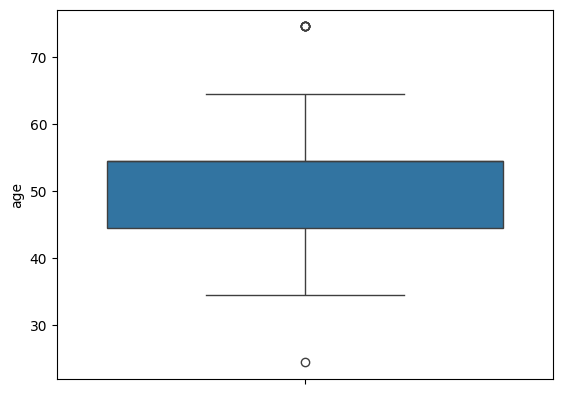

In [210]:
sns.boxplot(data['age'])

<Axes: ylabel='tumor-size'>

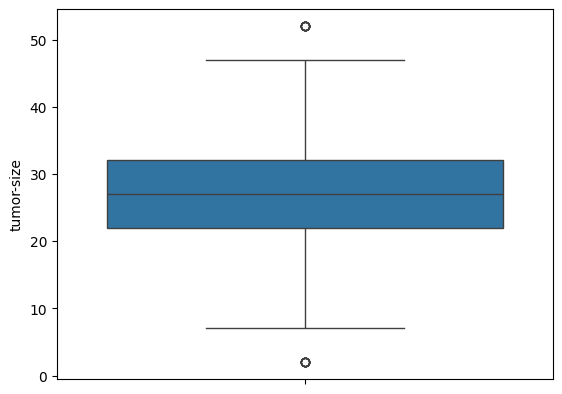

In [211]:
sns.boxplot(data['tumor-size'])


<Axes: ylabel='inv-nodes'>

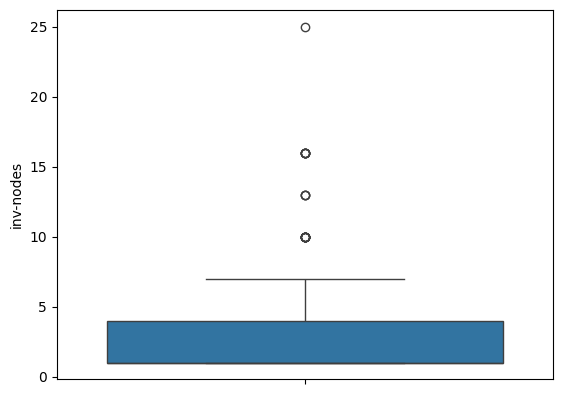

In [212]:
sns.boxplot(data['inv-nodes'])


<Axes: ylabel='deg-malig'>

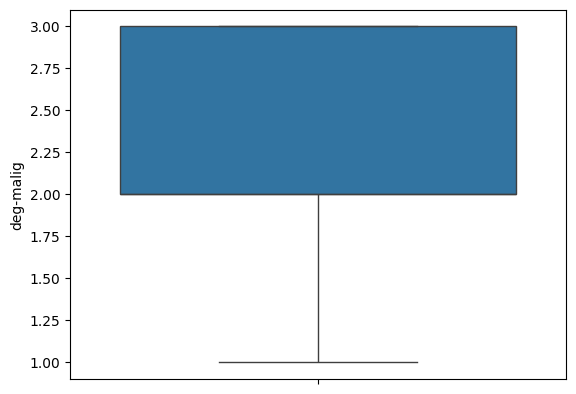

In [213]:
sns.boxplot(data['deg-malig'])


In [214]:
from sklearn.model_selection import train_test_split
X = data.drop(['class_recurrence-events'], axis=1)
Y = data['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1)


In [274]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn_search = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 100)}

from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(knn_search, param_grid, cv=5)

knn.fit(X_train, y_train)
print(f"best knn n:{knn.best_params_}")
best_knn = knn.best_estimator_

best knn n:{'n_neighbors': 8}


In [275]:
# Check the accuracy on the test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.73      0.97      0.83        58
        True       0.60      0.12      0.21        24

    accuracy                           0.72        82
   macro avg       0.66      0.55      0.52        82
weighted avg       0.69      0.72      0.65        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.73      0.98      0.83       133
        True       0.73      0.14      0.24        57

    accuracy                           0.73       190
   macro avg       0.73      0.56      0.53       190
weighted avg       0.73      0.73      0.65       190



In [284]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn_search_recall = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 100)}

from sklearn.model_selection import GridSearchCV
knn_recall = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")

knn_recall.fit(X_train, y_train)
print(f"best knn n:{knn_recall.best_params_}")
knn_recall_best = knn_recall.best_estimator_

best knn n:{'n_neighbors': 3}


In [285]:
# Check the accuracy on the test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred = (knn_recall_best.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
y_pred_train = (knn_recall_best.predict_proba(X_train)[:,1] >= 0.1).astype(bool)

print(f"Performance on TEST\n*******************\n{classification_report(y_test, y_pred)}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, y_pred_train)}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.76      0.45      0.57        58
        True       0.33      0.67      0.44        24

    accuracy                           0.51        82
   macro avg       0.55      0.56      0.50        82
weighted avg       0.64      0.51      0.53        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.56      0.71       133
        True       0.49      1.00      0.66        57

    accuracy                           0.69       190
   macro avg       0.75      0.78      0.69       190
weighted avg       0.85      0.69      0.70       190



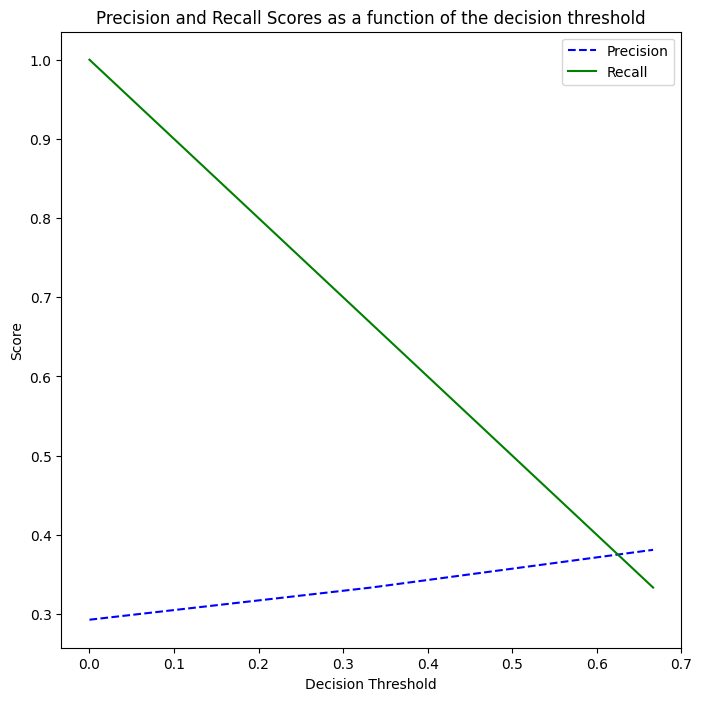

In [269]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
y_probs = knn_recall_best.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [225]:
from sklearn.metrics import confusion_matrix
def modified_predict(y_probs, threshold):
    """
    Returns modified predictions for a collection of raw probabilities, `y_probs`
    given a decision threshold, `threshold`.
    """
    result = []
    # iterate over the raw probabilities
    for y in y_probs:
        # compare each one to the threshold
        if y >= threshold:
            result.append(1)
        else:
            result.append(0)
    return result

def confusion_matrix_for_threshold(X, y, model, threshold):
    # first, get the raw scores
    y_probs = model.predict_proba(X)[:,1]
    # then, get the modified labels
    y_modified_pred = modified_predict(y_probs, threshold)
    # print a simple confusion matrix as a pandas dataframe so that
    # we can label the rows and columns
    print(pd.DataFrame(confusion_matrix(y, y_modified_pred),
                    columns=['Predicted_False', 'Predicted_True'],
                    index=['Actual_False', 'Actual_True']))

In [258]:
thresholds = [0.1, 0.3, 0.5]
# for m in models:
print(f"Model: {knn}\n")
for t in thresholds:
    print(f"threshold: {t}")
    confusion_matrix_for_threshold(X_test, y_test, knn, t)

Model: GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

threshold: 0.1
              Predicted_False  Predicted_True
Actual_False               26              32
Actual_True                 8              16
threshold: 0.3
              Predicted_False  Predicted_True
Actual_False               26              32
Actual_True                 8              16
threshold: 0.5
              Predicted_False  Predicted_True
Actual_False               45              13
Actual_True   

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.76      0.90      0.83        58
        True       0.57      0.33      0.42        24

    accuracy                           0.73        82
   macro avg       0.67      0.61      0.62        82
weighted avg       0.71      0.73      0.71        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.74      0.95      0.83       133
        True       0.65      0.23      0.34        57

    accuracy                           0.73       190
   macro avg       0.70      0.59      0.58       190
weighted avg       0.71      0.73      0.68       190



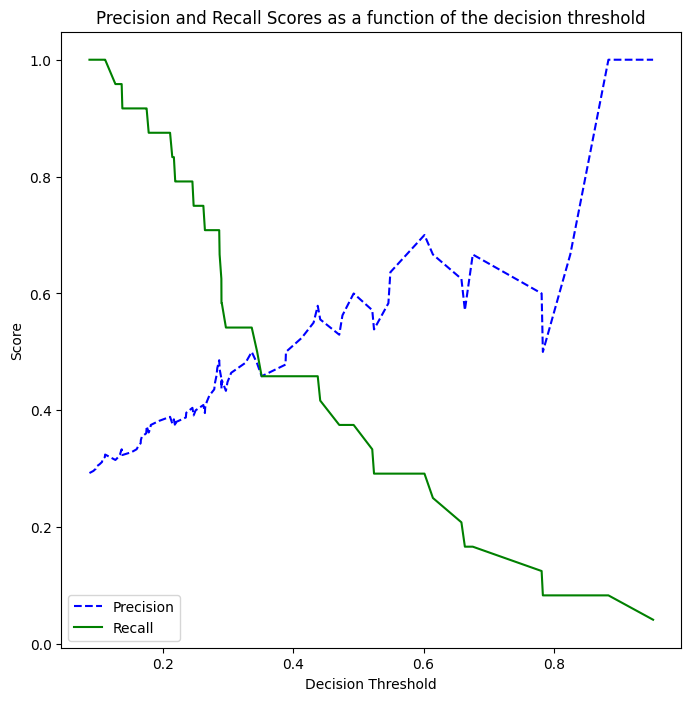

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fit the LG model -- random_state is used to shuffle the data; max_iter is max # of iterations for solver to converge (default is 100)
model = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
# print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

# generate the probabilities on the test set; here we could use any model
y_probs = model.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fit the LG model -- random_state is used to shuffle the data; max_iter is max # of iterations for solver to converge (default is 100)
model = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)

y_pred = (model.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
y_pred_train = (model.predict_proba(X_train)[:,1] >= 0.1).astype(bool)

# print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, y_pred)}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, y_pred_train)}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       1.00      0.07      0.13        58
        True       0.31      1.00      0.47        24

    accuracy                           0.34        82
   macro avg       0.65      0.53      0.30        82
weighted avg       0.80      0.34      0.23        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.92      0.09      0.16       133
        True       0.32      0.98      0.48        57

    accuracy                           0.36       190
   macro avg       0.62      0.54      0.32       190
weighted avg       0.74      0.36      0.26       190



In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv_accuracy = GridSearchCV(model, param_grid, cv=5, n_jobs=8)
gscv_accuracy.fit(X_train, y_train)
gscv_accuracy.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 12}

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.81      0.76      0.79        58
        True       0.50      0.58      0.54        24

    accuracy                           0.71        82
   macro avg       0.66      0.67      0.66        82
weighted avg       0.72      0.71      0.71        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.81      0.81      0.81       133
        True       0.55      0.54      0.55        57

    accuracy                           0.73       190
   macro avg       0.68      0.68      0.68       190
weighted avg       0.73      0.73      0.73       190



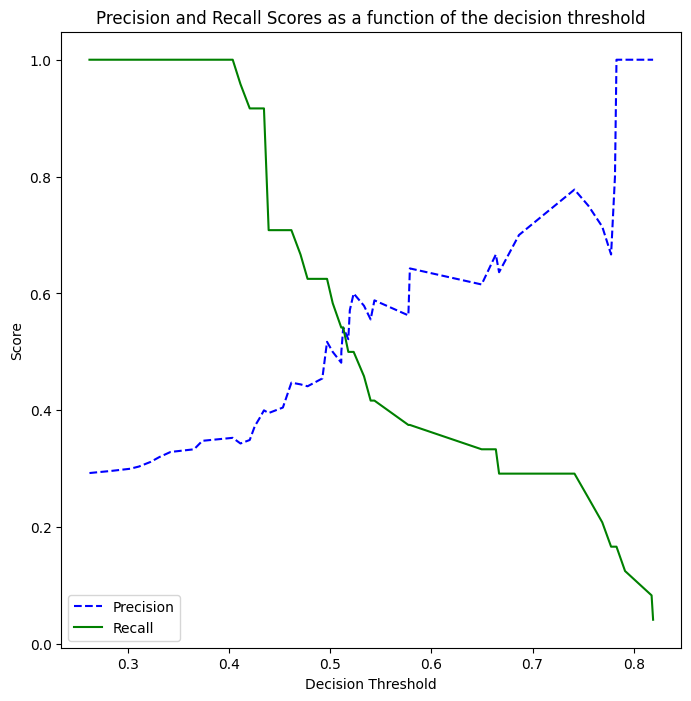

In [271]:
# from sklearn import tree
# tree.plot_tree(gscv.best_estimator_)
model = gscv_accuracy.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

# generate the probabilities on the test set; here we could use any model
y_probs = model.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv_recall = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv_recall.fit(X_train, y_train)
gscv_recall.best_params_


{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 10}

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       1.00      0.02      0.03        58
        True       0.30      1.00      0.46        24

    accuracy                           0.30        82
   macro avg       0.65      0.51      0.25        82
weighted avg       0.79      0.30      0.16        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.02      0.04       133
        True       0.30      1.00      0.47        57

    accuracy                           0.32       190
   macro avg       0.65      0.51      0.26       190
weighted avg       0.79      0.32      0.17       190



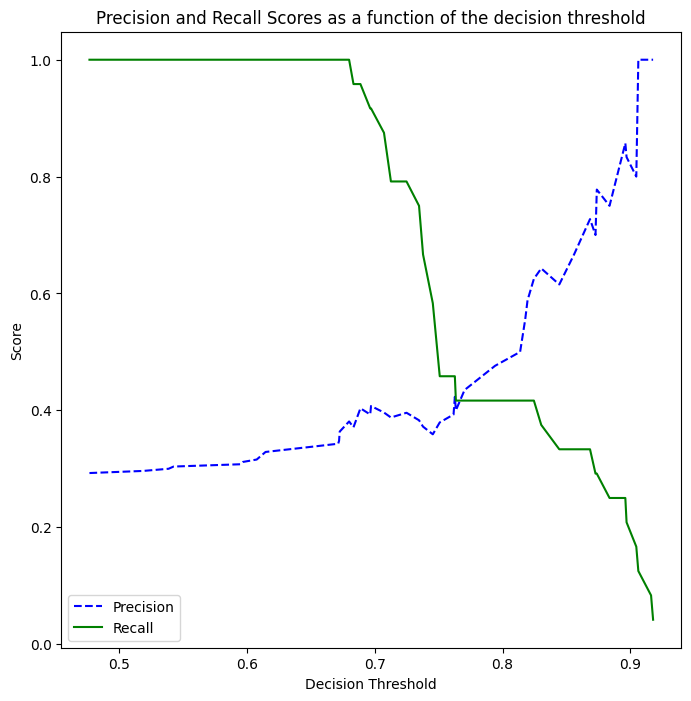

In [262]:
# from sklearn import tree
# tree.plot_tree(gscv.best_estimator_)
model = gscv_recall.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

# generate the probabilities on the test set; here we could use any model
y_probs = model.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)